# Linear Regression
Concerns itself with finding the 'line of best fit'

In [7]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [8]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [9]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] # Slope of the line
        c = self.parameters['c'] # Intercept of the line
        predictions = np.multiply(m, train_input) + c # Basic linear equation y = mx + c
        return predictions 

    def cost_function(self, predictions, train_output): # Calculate Mean Squared Error
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        # Prediction error (How wrong the predictions are)
        df = (predictions-train_output) # Difference (residuals)
        # Gradient of Loss (with regard to m) (How error changes with the slope)
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        # Mean as it is the Summation divided by n (number of samples) / since y = mx + c then dy/dm = x / 2 taken out
        # Gradient of Loss (with regard to c) (How error changes with the intercept)
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate):
        # the gradient tells us the direction of steepest increase in the loss function
        # we subtract the gradient thusly, as we want to minimize the loss function (make it in the lowest point)
        # This may get caught in a local minimum, but we can use different learning rates or optimization techniques to avoid that i.e. stochastic gradient descent
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = [] 

        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data') 

        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            predictions = self.forward_propagation(train_input) 
            cost = self.cost_function(predictions, train_output) 
            derivatives = self.backward_propagation(train_input, train_output, predictions) 
            self.update_parameters(derivatives, learning_rate) 
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c']) 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 
            return line, 

        ani = FuncAnimation(fig, update, frames=iters, interval=20, blit=True) 
        ani.save('linear_regression_A.gif', writer='pillow') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show()

        print("Final Parameters: m = {}, c = {}".format(self.parameters['m'], self.parameters['c'])) 

        return self.parameters, self.loss

Iteration = 1, Loss = 11090.741734810012
Iteration = 1, Loss = 1343.5123234795858
Iteration = 1, Loss = 168.86509563049674
Iteration = 1, Loss = 27.307313424433374
Iteration = 2, Loss = 10.248052184620898
Iteration = 3, Loss = 8.192217597633071
Iteration = 4, Loss = 7.944459200365533
Iteration = 5, Loss = 7.914593661446786
Iteration = 6, Loss = 7.910986584015371
Iteration = 7, Loss = 7.910543937756623
Iteration = 8, Loss = 7.910482640692971
Iteration = 9, Loss = 7.9104673011586835
Iteration = 10, Loss = 7.910457500808013
Iteration = 11, Loss = 7.9104483687903535
Iteration = 12, Loss = 7.910439318115118
Iteration = 13, Loss = 7.910430278043473
Iteration = 14, Loss = 7.91042124005054
Iteration = 15, Loss = 7.9104122031088915
Iteration = 16, Loss = 7.910403167094636
Iteration = 17, Loss = 7.910394131992762
Iteration = 18, Loss = 7.91038509780138
Iteration = 19, Loss = 7.910376064520176
Iteration = 20, Loss = 7.910367032149042


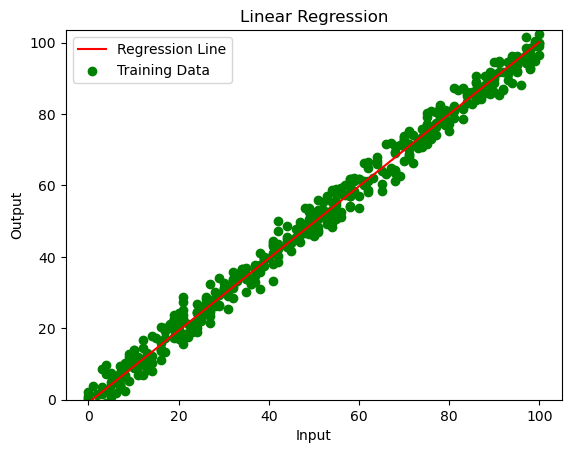

Final Parameters: m = 1.0100309903563771, c = -0.8325296239013109


In [10]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)